<a href="https://colab.research.google.com/github/noeliamg227/diabetes-prediction/blob/maria-llort-EDA-UMV-Aggregation/Collaborator2/02_EDA_Univariate_Multivariate_Analysis_and_Aggregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlation matrix, Univariate and Multivariate Analysis & Preprocessing

**Input:** `diabetes_clean.csv` generated by Collaborator 1.

**Outputs:**
- Correlation of predictors and correlation matrix.
- Key features selection based on correlation matrix.
- Scatterplots, histograms and pairplots of the cleaned diabetes data.
  - `univariate_analysis` function that performs univariate analysis on selected numeric features and computes summary statistics and plots histograms with KDE.
  - `scatterplot_by_group` function that generates scatter plots on the selected numeric features.
  - `histogram_by_group`function that generates histogram plots on the selected numeric features.
- `df_model.csv`: Ready-to-be-modelled dataframe with the key features and the outcome.
- `diabetes_aggregated_stats.csv`: Aggregated statistics of the df_model.

## 1 - Setup, imports & load of the cleaned datset

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Input produced by 01_Data_Cleaning.ipynb
df = pd.read_csv("Collaborator1/diabetes_clean.csv")

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
0,6,148,72,35,30.5,33.6,0.6270,50,1
1,1,85,66,29,30.5,26.6,0.3510,31,0
2,8,183,64,23,30.5,23.3,0.6720,32,1
3,1,89,66,23,94.0,28.1,0.1670,21,0
4,0,137,40,35,168.0,43.1,0.3725,33,1


## 2 - Dataset structure & target definition

In [136]:
# Inspect columns and data types of the cleaned diabetes dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        768 non-null    int64  
 1   glucose            768 non-null    int64  
 2   blood_pressure     768 non-null    int64  
 3   skin_thickness     768 non-null    int64  
 4   insulin            768 non-null    float64
 5   bmi                768 non-null    float64
 6   diabetes_pedigree  768 non-null    float64
 7   age                768 non-null    int64  
 8   outcome            768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In this section we will:

*   Understand distributions
*   Check relationships between variables
*   Detect subtle patterns or differences
*   Guide preprocessing and feature engineering

We are going to explore the main involved variables in the cleaned data, after the outliers and null values have been handled by Collaborator 1.

First, we need to determine the target value of the dataset, which in this case is the outcome, a binary indicator of diabetes diagnosis (0 = non-diabetic, 1 = diabetic).

In [137]:
# Define target variable explicitly.
TARGET = "outcome"

# Separate predictors and target
X = df.drop(columns=[TARGET])
y = df[TARGET]

print("Predictor shape:", X.shape)
print("Target shape:", y.shape)


Predictor shape: (768, 8)
Target shape: (768,)


## 3 - Correlation Matrix

We will use the correlation matrix to provide a clear overview of the relationships between variables in a dataset. This will helps us identify how strongly variables are related, detect multicollinearity, simplify complex data, guide feature selection, and support data exploration and analysis.

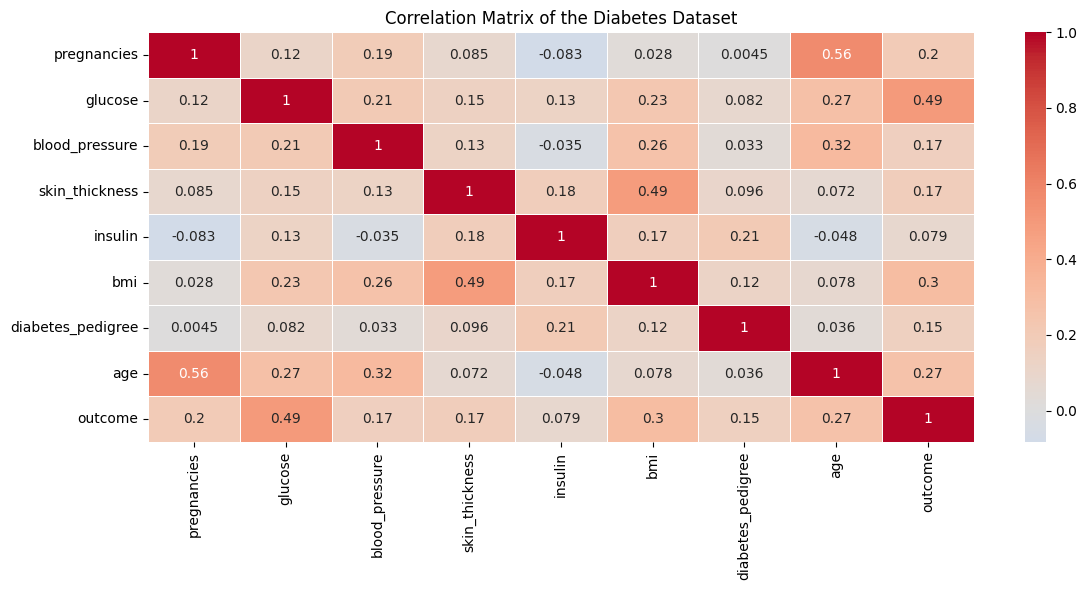

In [138]:
# Compute Pearson correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=True,
    linewidths=0.5
)
plt.title("Correlation Matrix of the Diabetes Dataset")
plt.tight_layout()
plt.show()


In [139]:
# Correlation of predictors with target
target_corr = corr_matrix[TARGET].sort_values(ascending=False)

target_corr


,outcome
outcome,1.000000
glucose,0.492782
bmi,0.300615
age,0.265858
pregnancies,0.202492
skin_thickness,0.171207
blood_pressure,0.166424
diabetes_pedigree,0.151994
insulin,0.078957


As a result of the correlation matrix we observe that:
- Glucose (0.493) → High importance (most predictive)
- BMI (0.301) → Moderate importance
- Age (0.266) → Moderate importance
- Pregnancies (0.202) → Moderate/low importance

As a summary, the correlation matrix shows that glucose is the strongest predictor of diabetes, followed by BMI and age, which have moderate positive relationships with the outcome. Most other variables have weak correlations with diabetes. Some predictors, such as age and pregnancies and BMI and skin thickness, are moderately correlated with each other, suggesting possible multicollinearity.

The next steps will be to perform Univariate & Multivariate (UMV) analysis of the dataset.

## 4 - Univariate analysis of the main variables in the cleaned dataset

On the previous notebook, created by Collaborator 1, the boxplots and histograms were computed to analyze the raw dataset. After the cleaning of the data performed, we will plot again the boxplots and histograms of the obtained key features by the correlation matrix.

This way we will look at one variable at a time, which will help us in understanding the distribution, central tendency, and spread of the main variables in the cleaned dataset.

Univariate Summary Statistics:



,count,mean,std,min,25%,50%,75%,max,median
glucose,768.0,121.656250,30.438286,44.0,99.75,117.0,140.25,199.0,117.0
bmi,768.0,32.198958,6.410558,18.2,27.50,32.0,36.30,50.0,32.0
age,768.0,32.760417,11.055385,21.0,24.00,29.0,40.00,66.0,29.0
pregnancies,768.0,3.782552,3.270644,0.0,1.00,3.0,6.00,13.0,3.0


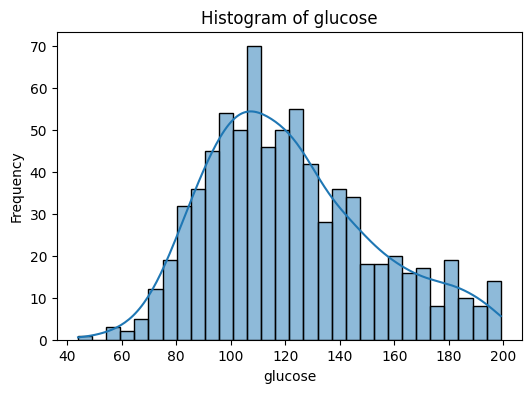

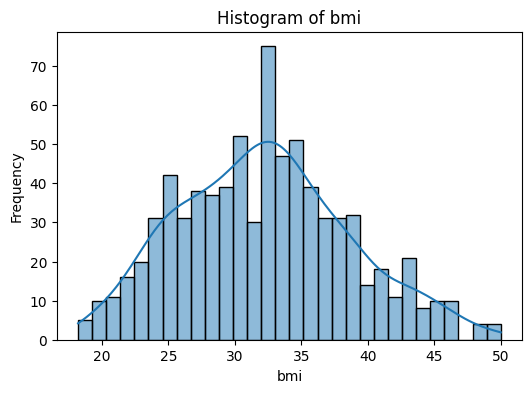

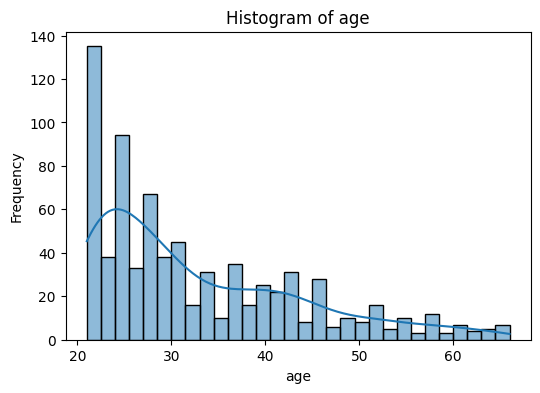

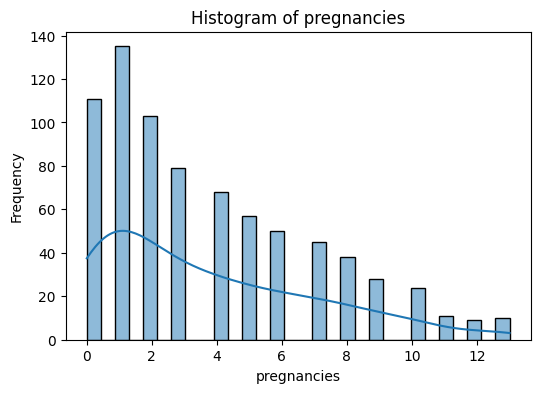

In [140]:
# Key features based on the correlation analysis.
key_features = ["glucose", "bmi", "age", "pregnancies"]

def univariate_analysis(df, features):
    """
    Perform univariate analysis on selected numeric features.
    Computes summary statistics and plots histograms with KDE.

    Args:
        df: Cleaned dataset
        features: List of numeric features to analyze

    Returns:
        pd.DataFrame: Summary statistics for selected features
    """
    summary_stats = df[features].describe().T
    summary_stats['median'] = df[features].median()

    print("Univariate Summary Statistics:\n")
    display(summary_stats)

    # Plot histograms
    for feature in features:
        plt.figure(figsize=(6,4))
        sns.histplot(df[feature], bins=30, kde=True)
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()


    return summary_stats


# Run univariate analysis
summary_stats = univariate_analysis(df, key_features)


## 5 - Multivariate analysis of the cleaned dataset

### 5.1 - Scatter Plots by outcome of the key features

In [141]:
def scatterplot_by_group(df, var1, var2, group_col, palette="Set2", figsize=(6, 4), save_path=None):
    """
    Creates a scatterplot of two variables colored by a grouping column.

    Parameters:
    df: Dataframe used.
    var1: Column name for x-axis.
    var2: Column name for y-axis.
    group_col: Column name to group by (hue).
    palette (optional): Color palette for the groups.
    figsize (optional): Size of the figure.
    save_path (optional): File path to save the figure. If None, figure is not saved.

    Returns:
    None
    """

    plt.figure(figsize=figsize)
    sns.scatterplot(
        x=df[var1],
        y=df[var2],
        hue=df[group_col],
        palette=palette
    )
    plt.title(f"{var1} vs {var2} by {group_col}")
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300)

    plt.show()

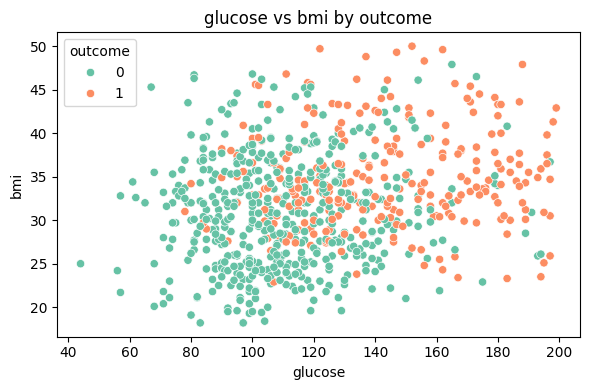

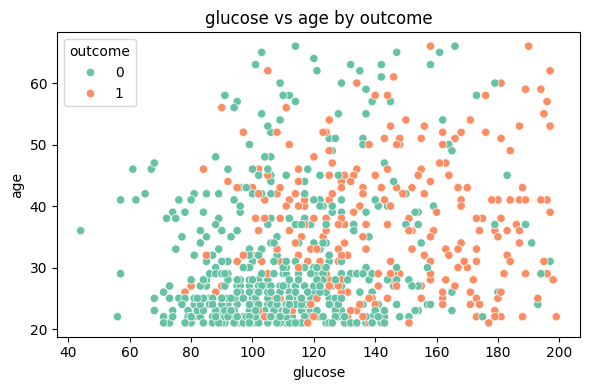

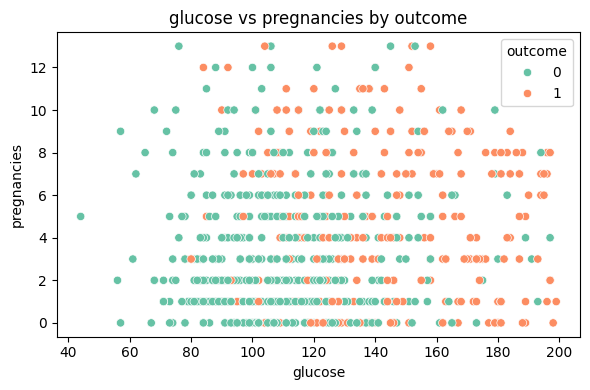

In [142]:
for feature in key_features[1:]: #excluding the glucose vs glucose comparison
    scatterplot_by_group(
        df=df,
        var1='glucose',
        var2=feature,
        group_col='outcome'
    )

### 5.2 - Histograms by outcome of the key features

In [143]:
def histogram_by_group(df, feature, group_col, figsize=(10, 4), palette="Set2", shrink=0.75, multiple="fill", kde=True, save_path=None):
    """
    Creates a histogram of a feature colored by a grouping column.

    Parameters:
    df: DataFrame.
    feature: Column name for the x-axis (feature to plot).
    group_col: Column name to group by (hue).
    figsize (optional): Size of the figure.
    palette (optional): Color palette for the groups.
    shrink (optional): Shrink parameter for histplot bars.
    multiple (optional): 'stack', 'fill', or 'dodge'.
    kde (optional): Whether to plot a KDE curve.
    save_path (optional): File path to save the figure.

    Returns:
    None
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.histplot(
        data=df,
        x=feature,
        hue=group_col,
        shrink=shrink,
        multiple=multiple,
        kde=kde,
        ax=ax,
        palette=palette
    )
    ax.set_title(f"Distribution of {feature} by {group_col}")
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300)

    plt.show()

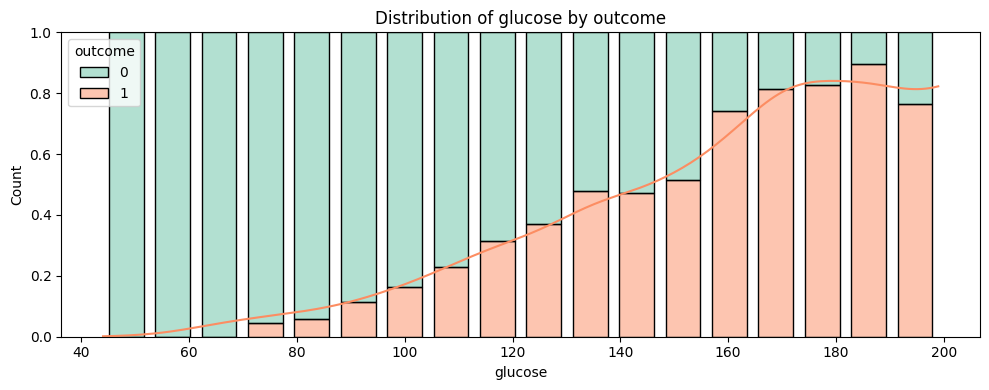

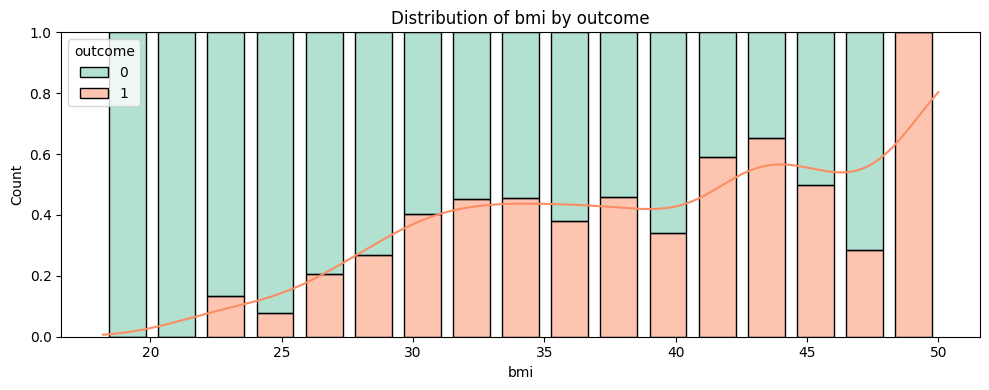

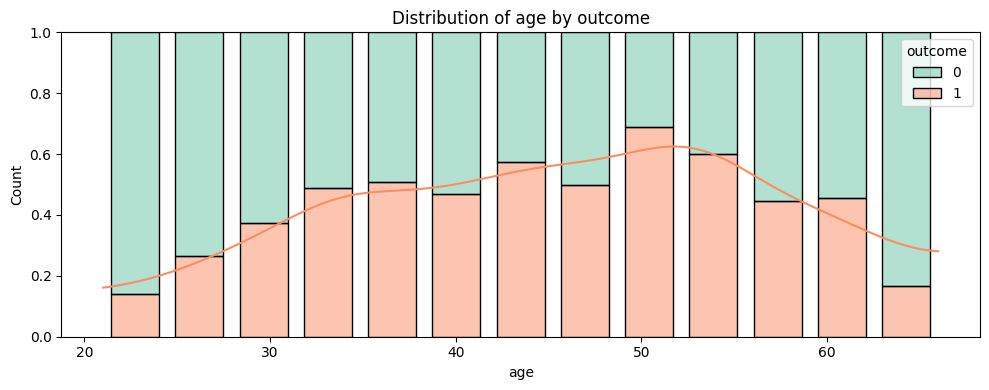

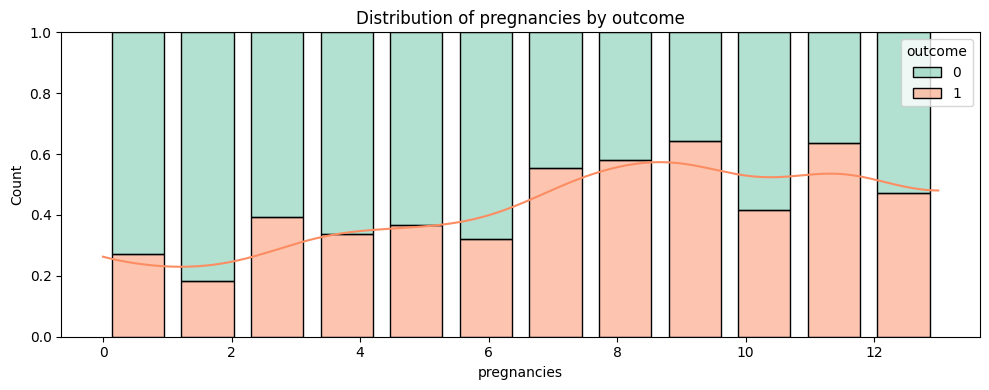

In [144]:
for feature in key_features:
    histogram_by_group(
        df=df,
        feature=feature,
        group_col='outcome'
    )

## 5.3 - Pairplots by outcome of the key features

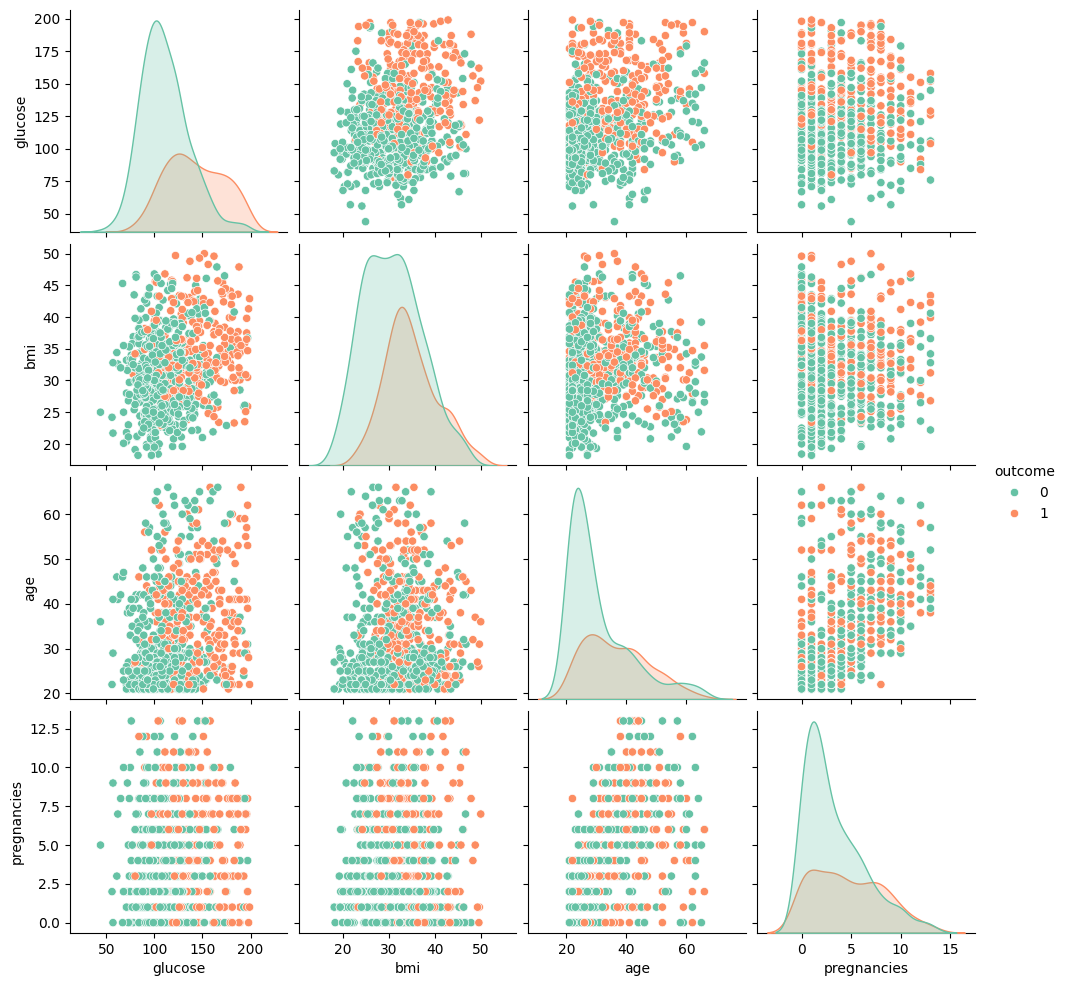

In [145]:
sns.pairplot(df, vars=key_features, hue='outcome', palette='Set2', diag_kind='kde')
plt.show()

This multivariate analysis reveals that glucose is the most significant indicator for a diabetes diagnosis, with the probability of a positive outcome rising sharply as levels exceed 150 mg/dL. While BMI and Age also show positive correlations, their distributions overlap more between groups; however, a BMI over 30 and an age range of 40–55 represent high-risk clusters. The data suggests that while pregnancies contribute to risk after the sixth instance, they are less predictive than metabolic factors. Ultimately, the strongest clinical signature for a positive outcome is the combination of elevated glucose and high BMI, whereas lower glucose levels tend to correlate with a negative diagnosis regardless of other physiological variables.

## 6 - Aggregate & Summarize Key Statistics by Outcome

In this section we provide the ready-to-be-modelled dataframe with the key features and the outcome.
- Groups the dataset by Outcome (0 = non-diabetic, 1 = diabetic).
- Computes mean, median, standard deviation, min, and max for each important feature.
- Produces a table summarizing feature distributions by Outcome, useful for modeling and insights.
- Saves the table as a CSV for Collaborator 3.

In [152]:
# Include the target
df_model = df[key_features + ['outcome']]

# Function to compute aggregated statistics
def aggregate_statistics(df, group_by='outcome'):
    """
    Compute mean, median, standard deviation, min, max for each feature grouped by target.
    """
    agg_stats = df.groupby(group_by).agg(['mean', 'median', 'std', 'min', 'max'])
    return agg_stats

# Compute aggregated statistics of the model
aggregated_stats = aggregate_statistics(df_model)

# Display the result
print("Aggregated Statistics by Outcome:\n")
print(aggregated_stats)


# Save to CSV
csv_path = "Collaborator2/df_key_features_and_outcome.csv"
df_model.to_csv(csv_path, index=False)
print("\nAggregated statistics saved to 'df_key_features_and_outcome.csv'")

csv_path = "Collaborator2/df_aggregated_stats.csv"
aggregated_stats.to_csv(csv_path, index=False)
print("\nAggregated statistics saved to 'df_aggregated_stats.csv'")

Aggregated Statistics by Outcome:

            glucose                                   bmi                   \
               mean median        std min  max       mean median       std   
outcome                                                                      
0        110.682000  107.5  24.707201  44  197  30.789000   30.4  6.322056   
1        142.130597  140.0  29.568839  78  199  34.829478   34.0  5.717238   

                           age                           pregnancies         \
          min   max       mean median        std min max        mean median   
outcome                                                                       
0        18.2  47.9  30.610000   27.0  10.675666  21  66    3.298000    2.0   
1        22.9  50.0  36.772388   36.0  10.643546  21  66    4.686567    4.0   

                           
              std min max  
outcome                    
0        3.017185   0  13  
1        3.529263   0  13  

Aggregated statistics saved to 'df_ke